## Initial text mining on my research diary notes over the past 6 monthes

The data used for this analysis is collected using the [terminal diary scripts](https://github.com/dorisjlee/terminal_diary) that I've been working on in the past year.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
PATH = "../../research_diary/org_md/"
import glob
import nltk
from wordcloud import WordCloud
doc = open(PATH+"hci.md").read()
from nltk.tokenize import RegexpTokenizer
#This tokenizer gets rid of punctuations (esp all that markdown stuff)
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(doc)

##### Only about 59% of the stuff I say is important....

In [5]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / float(len(text))
print content_fraction(words)

0.590773809524


In [6]:
stopwords = nltk.corpus.stopwords.words('english')
content = [w for w in words if w.lower() not in stopwords]

In [7]:
import codecs
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
mystopwords = ['etc','like','Doris','Lee','called']
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(mystopwords)
def preprocess(doc_path):
    doc = open(doc_path).read()
    content = tokenizer.tokenize(doc)
    #Remove words smaller than 3 and or not containing "_" (LaTeX symbols)
    content = [w for w in content if ('_' not in w and len(w)>3)]
    words= []
    for w in content:
        try:
            words.append(wordnet_lemmatizer.lemmatize(w))
        except (UnicodeDecodeError):
            pass
    # Normalize (lower), exlude stopwords, lemmatize 
    words = [w for w in words if w.lower() not in stopwords ]
    #only verbs and nouns (discard adjectives)
    words = [w[0] for w in nltk.pos_tag(words) if w[1] in ['NNS', 'NN', 'NNP', 'NNPS','VB','VBD','VBG','VBN','VBZ','VBP']]
    return words

In [8]:
all_words = []
for path in glob.glob(PATH+"*.md"):
    all_words.extend(preprocess(path))

In [9]:
len(all_words)

6340

In [121]:
outfile  = open("cleaned_words",'w')
outfile.write("\n".join(all_words))

# No filtering based on word type

(-0.5, 399.5, 199.5, -0.5)

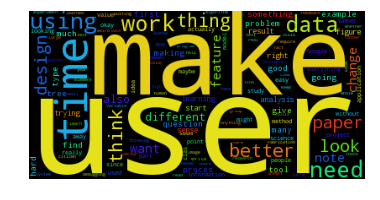

In [113]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")

# Excluding the Ellustrate user study notes

In [130]:
path_without_ellustrate = [_x for _x in glob.glob(PATH+"*.md") if 'ellustrate' not in _x]
all_words_without_ellustrate = []
for path in path_without_ellustrate:
    all_words_without_ellustrate.extend(preprocess(path))

(-0.5, 399.5, 199.5, -0.5)

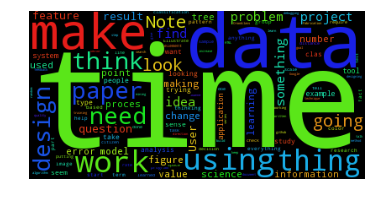

In [131]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")

# Only Verbs and Nouns

(-0.5, 399.5, 199.5, -0.5)

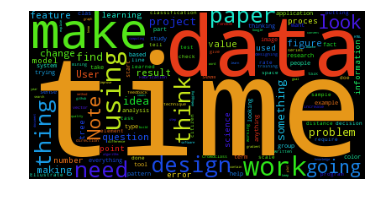

In [122]:
text = open("cleaned_words").read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")

# Relative word frequencies

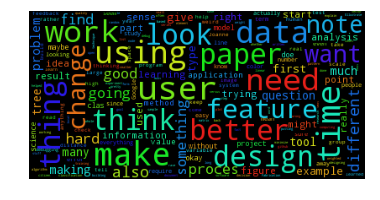

In [114]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sync organize all updated notes

#####Terminal diary automatically compiles notes with the same tags, per subject area

In [15]:
exclude  = open("../../research_diary/exclude_keywords").readlines()
import os
tags  = open("../../research_diary/word.md").readlines()
for t in tags:
    if t+'\n' not in exclude:
        os.system("python ../../research_diary/organize.py {} notes nopdf".format(t[:-1]))

# By Documents 

apad


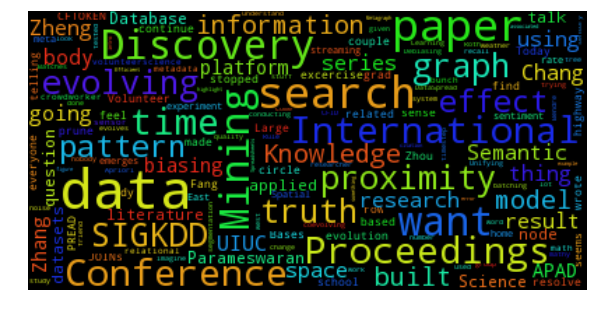

CHI


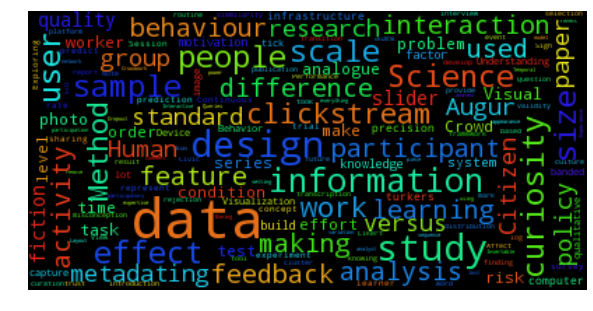

cloud


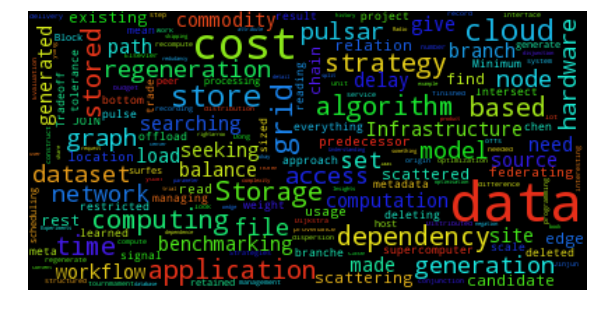

crowdclass


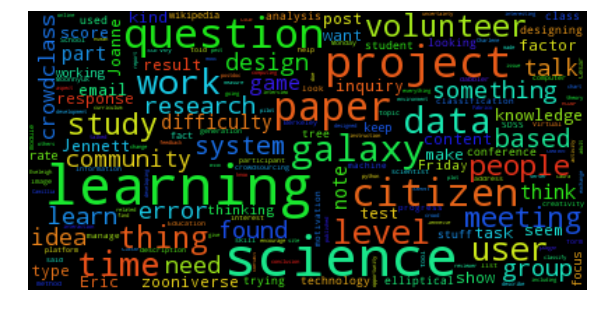

crowdclass_meeting


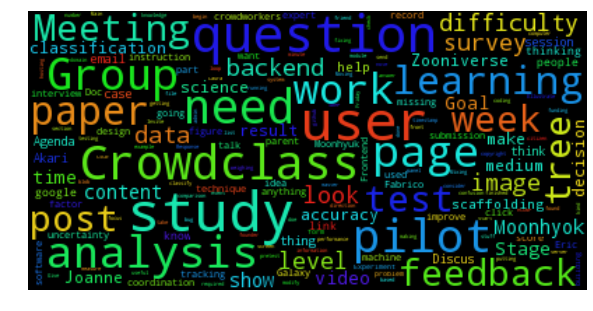

crowdclass_notes
cs189final


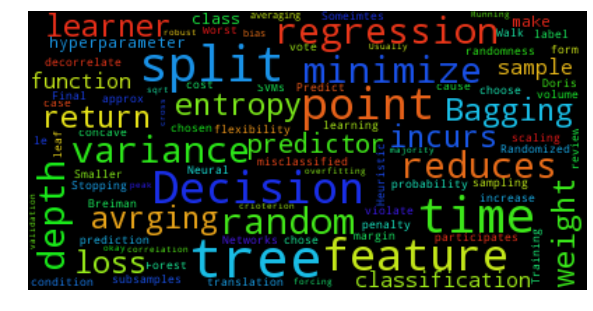

db


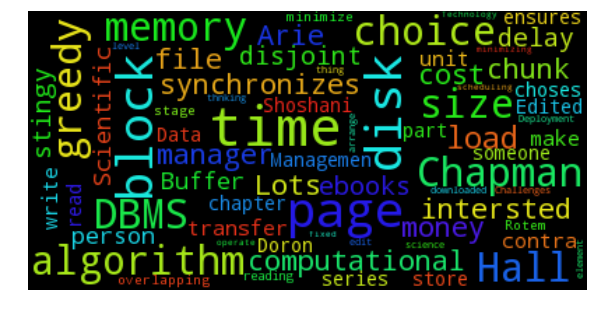

ds


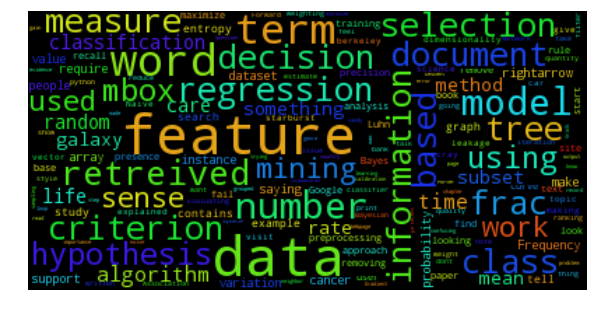

HCI


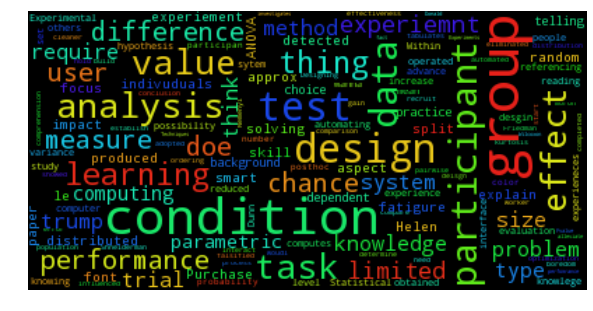

hpc


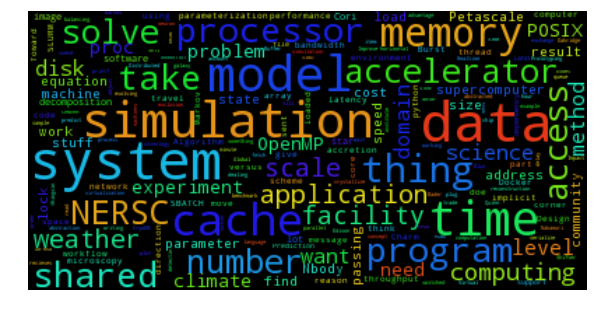

ir


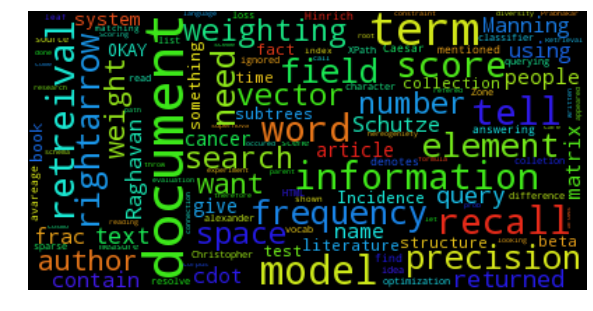

lbnl


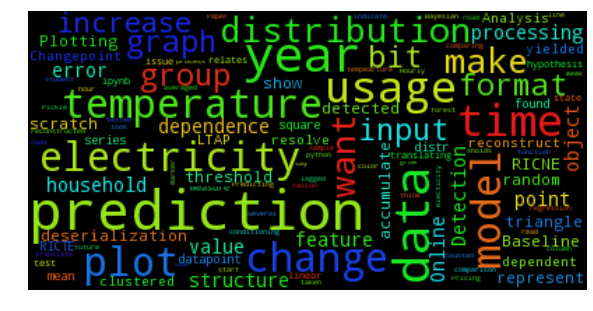

lsn


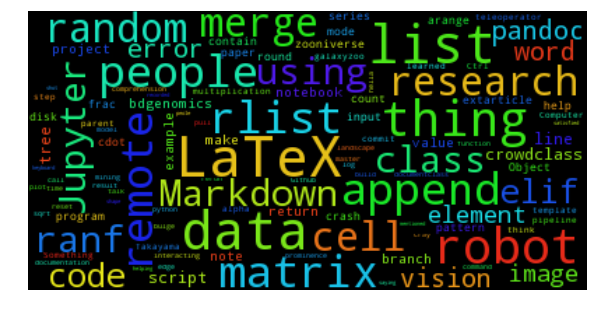

mango


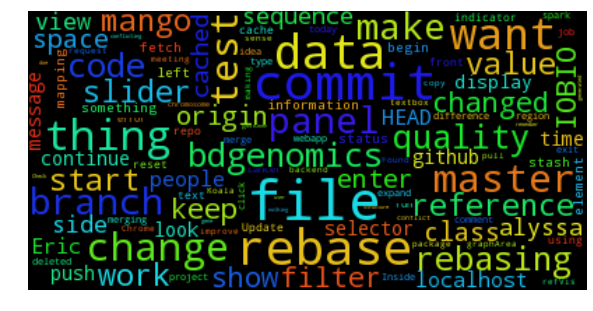

misc


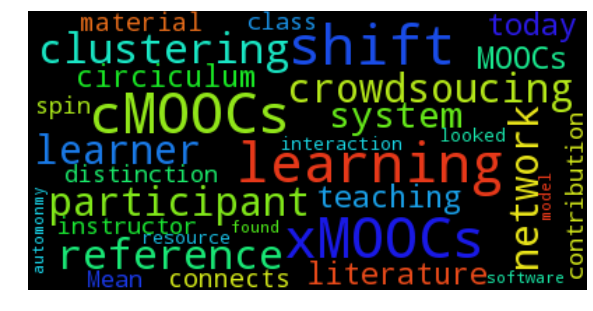

In [ ]:
# image_colors = ImageColorGenerator(book)
for path in glob.glob(PATH+"*.md"):
    
    all_words = preprocess(path)
    try:
        subject = path.split("/")[-1][:-3]
        if subject+'\n' not in exclude:
            fname = subject+"_words"
            outfile  = open(fname,'w')
            outfile.write("\n".join(all_words))
            outfile.close()
            text = open(fname).read()
            print subject
            wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
            plt.figure(figsize=(10,10), dpi=300)
    #         plt.figure()
            plt.imshow(wordcloud)
    #         plt.imshow(wordcloud.recolor(color_func=image_colors))
            plt.axis("off")
            plt.show()
    except (IndexError):
        pass

# Unsucessful attempt to play with masks 

In [8]:
# elps =  plt.imread("ellipse_mask.png").astype('int')*256

In [50]:
book=  plt.imread("book_mask.jpeg")#.astype('int')*256

<matplotlib.colorbar.Colorbar instance at 0x119c51758>

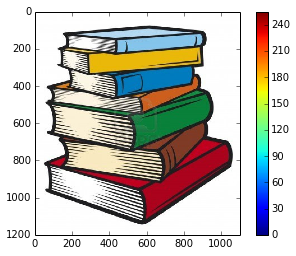

In [51]:
plt.imshow(book)
plt.colorbar()

In [48]:
from wordcloud import ImageColorGenerator

189org


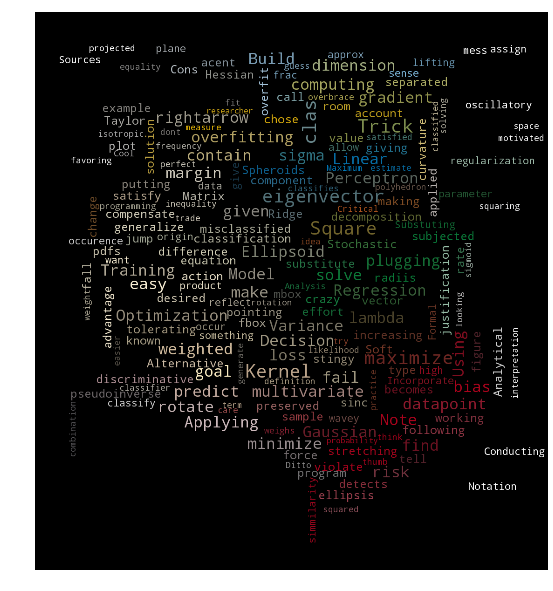

apad


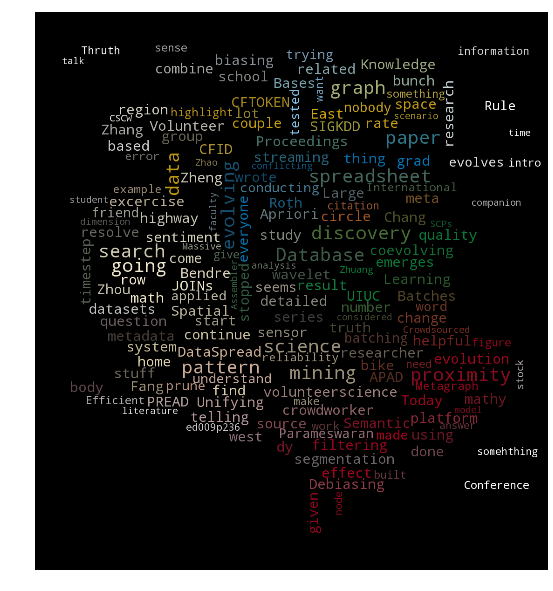

In [52]:
image_colors = ImageColorGenerator(book)
for path in glob.glob(PATH+"*.md")[:2]:
    all_words = preprocess(path)
    try:
        subject = path.split("/")[-1][:-3]
        fname = subject+"_words"
        outfile  = open(fname,'w')
        outfile.write("\n".join(all_words))
        outfile.close()
        text = open(fname).read()
        print subject
        wordcloud = WordCloud(max_font_size=40, relative_scaling=.5,mask=book).generate(text)
        plt.figure(figsize=(10,10), dpi=250 )
#         plt.imshow(wordcloud)
        plt.imshow(wordcloud.recolor(color_func=image_colors))
        plt.axis("off")
        plt.show()
    except (IndexError):
        pass

In [68]:
el=  plt.imread("ellipse2.png").astype("uint")

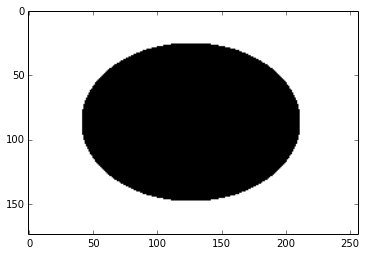

In [70]:
plt.imshow(el)

In [72]:
el=  plt.imread("alice_mask.png").astype("uint")

<matplotlib.colorbar.Colorbar instance at 0x11b9bdd40>

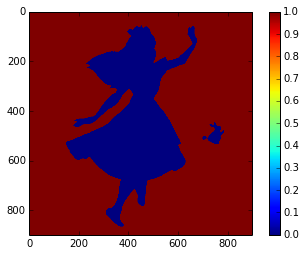

In [76]:
plt.imshow(el)
plt.colorbar()